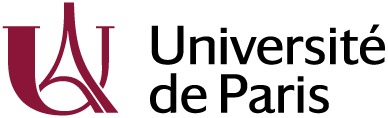
# Intro to Python - Class 3
## Sylvain Lobry, 07/11/2022

In today's class, we will see:
* Some useful modules
* List - Part 2
* Data structures

## 1 Modules - part 2

### Modules to know
In this section, we briefly review some modules in python standard library that you are likely to need. Of course, this is not an exhaustive list, either regarding the modules or their contents.

As a note, there are two main reasons that you would want to use modules from the standard library:
* The obvious one: to extend functionality
* The less obvious one: it executes in general faster than what you could program easily

#### Math
Link to [documentation](https://docs.python.org/3/library/math.html).

The math module defines many mathematical functions and constants that you will need in both of your work domains (VMI and IAD). It is following the C standard that most of you already know, and most functions are actually bindings to the C implementation. As a result, even when you could programm it yourself, using these functions would be more efficient than a naive implementation.

To use it, you obviously first need to import it:

In [1]:
import math


You can then use the constants:

In [2]:
print(math.pi)
print(math.e)
print(math.inf)
print(math.nan)

3.141592653589793
2.718281828459045
inf
nan


And functions from the C library:

In [3]:
#Trigo
print(math.sin(math.pi/2))
print(math.cos(0))

1.0
1.0


In [4]:
#Power and log
print(math.exp(math.log(math.e)))
print(math.pow(9, 1/2))
print(math.sqrt(9))

2.718281828459045
3.0
3.0


In [5]:
#Other
print(math.ceil(math.e))
print(math.floor(math.e))
print(math.factorial(3))

3
2
6


#### Random
Link to [documentation](https://docs.python.org/3/library/random.html).

The random module is useful to generate pseudo-random numbers. It is important to note that this generator is deterministic!

It is first initialized using a seed, which can be `None` or an `int` (other types can be put, and will be cast to `int` internally). If the seed is `None` current time will be used.


In [6]:
import random

random.seed() #use the current time
random.seed(42) #use a specific seed

To generate a random integer, you can use randint(start, stop) which will return an integer between start and stop (included)

In [7]:
for i in range(5):
    print(random.randint(1, 6))

6
1
1
6
3


There are a lot of options to generate random number from continuous distributions. However, it is often sufficient to use random() which will simply return a number between 0 and 1:

In [8]:
for i in range(5):
    print(random.random())

0.24489185380347622
0.1395379285251439
0.1024951761715075
0.7406677446676758
0.5453665337483498


Finally, note that Python's random module offers functions to randomize sequences. For instance, random.shuffle() will shuffle a list in place:

In [9]:
my_list = list(range(10))
print(my_list)
random.shuffle(my_list)
print(my_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 5, 2, 4, 1, 8, 7, 0, 6, 9]


#### Sys
Link to [documentation](https://docs.python.org/3/library/sys.html).

This module allows to interact with the current interpreter. For instance, we can see which modules have been loaded in the interpreter so far, or which paths are used to search for modules (you will need that!!)

In [10]:
import sys

print('random' in sys.modules)
#print(sys.path)

True


You will also often need `sys.argv` which contains the list of arguments with which the program was called (similarly to C). Note that there is no `sys.argc`, as it can be obtained with `len(sys.argv)`.

#### Os
Link to [documentation](https://docs.python.org/3/library/os.html).

You likely came across portability issues in previous projects. Python provides a module allowing to use operating system functionalities in a plateform agnostic way.

For instance, you can get the current working directory with `os.getcwd()` or change it with `os.chdir(path)`.

Path are indeed one of the first difference generally seen between Unix and Windows systems. Python provides a specific submodule for that with `os.path`. For instance, `os.path.join()` will join path components in a system dependent way. Try executing the following on your machine: 



In [11]:
import os
os.path.join(os.getcwd(), sys.argv[0])

'/Users/slobry/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/ipykernel_launcher.py'

You can also list files in a directory (`os.listdir()`), create a directory (`os.mkdir()`), test the presence of a file (`os.path.exists()`), ...

## 2 Lists - part 2
### 2.1 Advanced methods
We have already seen a few methods that apply to lists, but I wanted to show you new ones, which can be useful in specific cases.

#### Modifying lists
We have already seen the `append()` method to add an element at the end of a list. It is possible to add an element at any given position with the `insert(pos, elt)` method:

In [12]:
my_list = list(range(10))
print(my_list)
my_list.insert(2, 42)
print(my_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 42, 2, 3, 4, 5, 6, 7, 8, 9]


Elements can be deleted using the `del` keyword:

In [13]:
print(my_list)
del my_list[2]
print(my_list)

[0, 1, 42, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Finally, you can also use the `remove(elt)` method to remove an element given its value:

In [14]:
my_list = list(range(10))
print(my_list)
my_list.append(5)
print(my_list)
my_list.remove(5)
print(my_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 5]
[0, 1, 2, 3, 4, 6, 7, 8, 9, 5]


#### Re-aranging lists

In addition to `random.shuffle()` seen earlier, let's look at two methods to re-arange a list. The first one is `reverse()` which, as you can guess, will reverse the list:

In [15]:
my_list = list(range(10))
print(my_list)
my_list.reverse()
print(my_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


You also have a `sort()` method available, which by default will sort the values in ascending order:

In [16]:
random.shuffle(my_list)
print(my_list)
my_list.sort()
print(my_list)

[2, 4, 9, 7, 5, 0, 8, 3, 6, 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


This method has two optional arguments: the first one is reverse, which when True, will sort in descending order:

In [17]:
random.shuffle(my_list)
print(my_list)
my_list.sort(reverse=True)
print(my_list)

[7, 8, 3, 0, 2, 9, 1, 4, 5, 6]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


The second is key, which can be set to a function which specifies the return criteria. For instance, let's say we want to order the following list based on the length of the string: 

In [18]:
my_list = "Bonjour les M1 IAD et VMI".split()
print(my_list)

def sort_fun(x):
    return len(x)

my_list.sort(key=sort_fun)
print(my_list)

['Bonjour', 'les', 'M1', 'IAD', 'et', 'VMI']
['M1', 'et', 'les', 'IAD', 'VMI', 'Bonjour']


Do you remember lambda functions? This is a typical example where it makes sense. The previous example can be rewritten as:

In [19]:
my_list = "Bonjour les M1 IAD et VMI".split()
print(my_list)
my_list.sort(key=lambda x: len(x))
print(my_list)

['Bonjour', 'les', 'M1', 'IAD', 'et', 'VMI']
['M1', 'et', 'les', 'IAD', 'VMI', 'Bonjour']


And in this very specific case, we could write:

In [20]:
my_list = "Bonjour les M1 IAD et VMI".split()
print(my_list)
my_list.sort(key=len)
print(my_list)

['Bonjour', 'les', 'M1', 'IAD', 'et', 'VMI']
['M1', 'et', 'les', 'IAD', 'VMI', 'Bonjour']


### 2.2 List comprehension
We are now going to see a typical Python syntax which allows to create a new list based on conditions on an iterable. Let's introduce it with an example: if you want to create a list with odd numbers for 0 to 10, you could do:

In [21]:
my_list = []

for i in range(10+1):
    if i % 2 == 1:
        my_list.append(i)
        
print(my_list)

[1, 3, 5, 7, 9]


With list comprehension, you can simply do the following:

In [22]:
my_list = [i for i in range(10 + 1) if i % 2 == 1]
print(my_list)

[1, 3, 5, 7, 9]


As you can see, the syntax is as follow:

`[expression for item in iterable if condition]`

You do not need to use it (as we have seen it can always be replaced by a for loop and `append()` calls), but do not hesitate to do so and do not be surprised if you see it!

### 2.3 Copy

When you assign a list to a new variable, Python actually creates a reference (as seen in C++) and not a copy:

In [23]:
my_list = list(range(10))
my_list2 = my_list
del my_list2[5]
print(my_list)

[0, 1, 2, 3, 4, 6, 7, 8, 9]


This can be particularly problematic when passing a list as a function's parameter, as you generally do not expect this behavior. If what you want is a copy, you need to explicitely request it with `[:]` or `list()`:

In [24]:
print("Using [:]")
my_list = list(range(10))
my_list2 = my_list[:]
del my_list2[5]
print(my_list)

print("Using list()")
my_list = list(range(10))
my_list2 = list(my_list)
del my_list2[5]
print(my_list)

Using [:]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Using list()
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Note that this a shallow copy: if a list was an element of a list, it will just copy the reference, not the list. In this case, you can use the `deepcopy()` function found in the module copy

In [25]:
print("Using list()")
my_list = [[i for i in range(j, j + 2)] for j in range(3)]
print(my_list)
my_list2 = list(my_list) #Inner lists are references, not copies
del my_list2[0][1]
print(my_list)

print("Using deepcopy()")
import copy
my_list = [[i for i in range(j, j + 2)] for j in range(3)]
print(my_list)
my_list2 = copy.deepcopy(my_list) #Inner lists are also copies
del my_list2[0][1]
print(my_list)

Using list()
[[0, 1], [1, 2], [2, 3]]
[[0], [1, 2], [2, 3]]
Using deepcopy()
[[0, 1], [1, 2], [2, 3]]
[[0, 1], [1, 2], [2, 3]]


## 3 Data structures
We have already seen one data structure: `list`. Of course, the Python standard library offers other data structures which can be useful in some cases. As of today, there are 4 data structures in the Python standard library:
* `list`
* `tuples`
* `sets`
* `dictionaries`

### 3.1 Tuples

A tuple is a structure which can contain several elements. Just as lists, they are ordered. However, its content cannot be changed (it is said "immutable" whereas lists are "mutable"). They are declared as follow:

In [2]:
my_tuple = (1, 'a')

Note that the parenthesis are totally optional, although most often used:

In [4]:
my_tuple = 1, 'a'
print(my_tuple)

(1, 'a')


You can also define a single element tuple with the following notation:

In [5]:
single_elt = (42,)
not_a_tuple = (42)
print(single_elt)
print(not_a_tuple)

(42,)
42


You can obtain the length of the tuple using the `len` built-in and index elements as you were doing on lists:

In [29]:
print(len(my_tuple))
print(my_tuple[0])

2
1


As they are immutable, the following operations will NOT work:

In [30]:
my_tuple.append(3)
my_tuple[0] = 2

AttributeError: 'tuple' object has no attribute 'append'

However, it is of course possible to concatenate two tuples in another one:

In [31]:
my_tuple2 = my_tuple + (42,)
print(my_tuple2)

(1, 'a', 42)


Therefore, the main use cases of tuples versus lists are:
* When the data should not be changed
* When the data cannot be changed (we have not seen an example of that yet)
* When performance is an issue (although the difference is generally small)

### 3.2 Sets

A set is another container which has the following properties:
* each element is unique (a set cannot contain duplicates)
* it is unordered
* elements in the set are immutable, although the set can be modified.

It can be constructed using `{}`:

In [32]:
my_set = {1, 3, "a", 42, "b"}
print(my_set)

{'a', 1, 3, 42, 'b'}


or the `set()` built-in:

In [33]:
my_set2 = set([3, 4])
print(my_set2)

{3, 4}


Note that `set()` is the only way of creating an empty set. We'll see why in a few slides.

To add an element to a set, we use the `add(elt)` method:

In [34]:
my_set.add(21)
print(my_set)

{'a', 1, 3, 21, 42, 'b'}


Note that it was not added "at the end" (because there is no notion of order, there is no reason that it would be printed at the end). We said that each element is unique, therefore, if I retype the previous command, no element will be added:

In [35]:
my_set.add(21)
print(my_set)

{'a', 1, 3, 21, 42, 'b'}


Despite, not having an order, a set is still iterable (though you cannot predict the order):

In [36]:
for elt in my_set:
    print(elt, end = " ")

a 1 3 21 42 b 

There are typical set operations:
* intersections
* unions
* complements

In [37]:
set1 = set(range(3,10))
set2 = {i for i in range(10) if i % 2 == 0}

print(f"set1 = {set1}")
print(f"set2 = {set2}")

#Intersection
print(f"Intersection = {set1 & set2}")
#Union
print(f"Union = {set1 | set2}")
#Symmetric difference
print(f"Symmetric difference = {set1 ^ set2}")
#Relative complement of set2 in set1
print(f"Complement of set2 in set1 = {set1 - set2}")

set1 = {3, 4, 5, 6, 7, 8, 9}
set2 = {0, 2, 4, 6, 8}
Intersection = {8, 4, 6}
Union = {0, 2, 3, 4, 5, 6, 7, 8, 9}
Symmetric difference = {0, 2, 3, 5, 7, 9}
Complement of set2 in set1 = {9, 3, 5, 7}


### 3.3 Dictionaries
A dictionary is another container which has the particularity of not being indexed by a number (which is the case for lists and tuples) but by a key which the user can define. It is also defined using `{}`:

In [38]:
entry = {"date":2021, "sensor":"S2"}
print(entry["date"])
print(entry["sensor"])

2021
S2


In this example, we have two keys:
* date
* sensor
with the values:
* 2021
* "S2"

A key can be any immutable object. Therefore we can have a tuple as a key, but not a list:

In [39]:
dummy_dic = {}
dummy_dic[(1,2)] = 1
print(dummy_dic)
dummy_dic[[1, 2]] = 1
print(dummy_dic)

{(1, 2): 1}


TypeError: unhashable type: 'list'

It is possible to add another element to our dictionnary using the following syntax:

In [40]:
entry["type"] = "optical"
print(entry)

{'date': 2021, 'sensor': 'S2', 'type': 'optical'}


You can get the keys used in a dictionnary using the `keys()` method and the values with `values()`:

In [41]:
print(entry.keys())
print(entry.values())

dict_keys(['date', 'sensor', 'type'])
dict_values([2021, 'S2', 'optical'])


To iterate through a dictionnary, you can use the following methods:

In [42]:
print("With keys()")
for k in entry.keys():
    print(f"{k}: {entry[k]}")

print("\nWith items()")
for k, v in entry.items(): #What type does items return??
    print(f"{k}: {v}")

With keys()
date: 2021
sensor: S2
type: optical

With items()
date: 2021
sensor: S2
type: optical


Finally, note that you can also use comprehension features over dictionnaries:

In [43]:
plus1 = {x: x+1 for x in range(5)}
print(plus1)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5}


## Conclusion
Today we have seen:
* Some useful modules
* List - Part 2
* Data structures

Keep in mind that we have only seen a few modules from the standard library, and that there are much more (and several order of magnitude more for modules not in the standard). You will probably have to use some of them in this class, and definitely if you continue using Python.

As going through all of them would be impossible in the given duration of this course (and also, boring), you have to refer to Python's documentation.

As an exercise, try to look back at the class on datastructures and try to have a good grip on which ones are immutable, which ones are oredered, what are the main differences, ...